### Week 8 - Clustering

Welcome to Week 8 lab. This week we focus our attention on **Clustering techniques**. Clustering is a fundamental unsupervised learning approach that allows us to discover inherent groupings within data based on similarity measures, without the need for predefined labels. In this lab, we will provide you with the tools to perform various clustering methods, enabling you to identify patterns and structures in your datasets. Specifically, we will focus on three key areas:

1. **K-Means Clustering**
   - Understanding the k-means algorithm
   - Implementing k-means clustering in R
   - Determining the optimal number of clusters

2. **Hierarchical Clustering**
   - Exploring agglomerative and divisive methods
   - Creating dendrograms to visualize cluster hierarchies
   - Applying hierarchical clustering to real-world data

3. **Density-Based Clustering**
   - Introducing DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
   - Identifying clusters of arbitrary shapes
   - Handling noise and outliers in datasets

By the end of this lab, you will be equipped to apply these clustering techniques to your own data, helping you uncover meaningful insights and make data-driven decisions without relying on labeled outcomes.

### Loading Sample Cluster data

Today, we will be using the cluster.txt file which contains such pre-generated cluster within a dataset.

In [36]:
library(tidyverse)
library(tidymodels)
library(tidyclust)   # for implementing clustering
library(skimr)
library(ggthemr)
library(factoextra)

ggthemr("flat")

# Read the csv file into a tibble
data <- as_tibble(read_csv(file = 'Datasets/cluster.txt'))
data %>%  slice_head(n = 5)


Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 1000 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (1): feature_a
num (1): feature_b

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


feature_a,feature_b
<dbl>,<dbl>
6.28531,11.58790
9.39775,5.44890
5.73624,8.68033
6.10197,9.83266
9.29479,5.67373


In [37]:
data %>% glimpse()

Rows: 1,000
Columns: 2
$ feature_a <dbl> 6.28531, 9.39775, 5.73624, 6.10197, 9.29479, 8.02703, 5.0269~
$ feature_b <dbl> 11.58790, 5.44890, 8.68033, 9.83266, 5.67373, 7.67945, 6.036~


### Visual Inspectation of the Dataset

A useful exercise would be to visualize the dataset to determine whether clustering is a good idea.

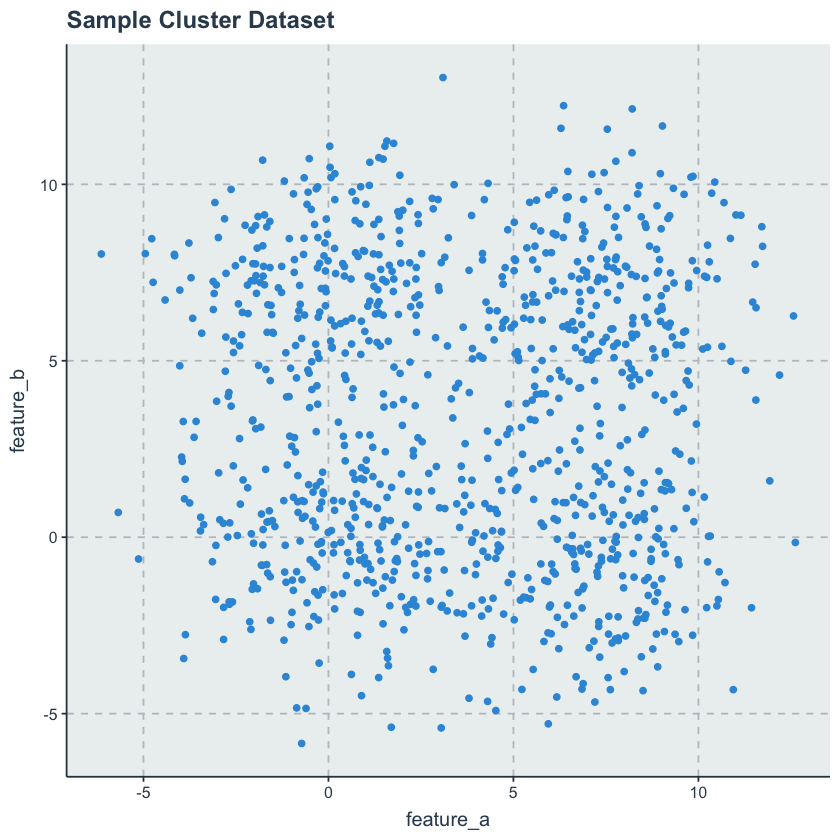

In [38]:
ggplot(data = data, aes( x = feature_a, y = feature_b )) + 
      geom_point() +
      ggtitle('Sample Cluster Dataset')

### Implementing Clustering Model with tidyclust

Much like we have done many times, we set up the model usting tidymodels framework, specifying the method, engine and mode. The nstart=20 allows for the engine to have multiple centroid starts. Once we have set the parameters we can run out model.

In [39]:
kmeans_spec <- k_means(num_clusters = 3) %>%
                set_mode("partition") %>%
                set_engine("stats") %>%
                set_args(nstart = 20)  # setting multiple initial starts for centroids

kmeans_spec

K Means Cluster Specification (partition)

Main Arguments:
  num_clusters = 3

Engine-Specific Arguments:
  nstart = 20

Computational engine: stats 


In [40]:
set.seed(1234)
kmeans_fit <- kmeans_spec %>%
              fit(~., data = data)

# the summary plots a number of items. lets get the fit
extract_fit_summary(kmeans_fit)

feature_a,feature_b
<dbl>,<dbl>
7.5664244,6.3885367
-0.4034439,6.4201531
3.7697762,-0.6935763


## Extracting Centroids and Model Summary

Once the model has been train, one thing we can do is extract centroids directly from the dataset. This allows us to observe the center of the cluster as determined by the model.

In [41]:
extract_centroids(kmeans_fit)

.cluster,feature_a,feature_b
<fct>,<dbl>,<dbl>
Cluster_1,7.5664244,6.3885367
Cluster_2,-0.4034439,6.4201531
Cluster_3,3.7697762,-0.6935763


Extracting the Summary is the next logical step, allowing us to reveal further details about the model including a sense of the $SSE$ within and across the dataset.

In [42]:
extract_fit_summary(kmeans_fit)

feature_a,feature_b
<dbl>,<dbl>
7.5664244,6.3885367
-0.4034439,6.4201531
3.7697762,-0.6935763


## Visualizing the Clusters 

The code below visualizes the original data with the cluster overlaid as the categorical block. This way we can see the scatter plot as clusters.

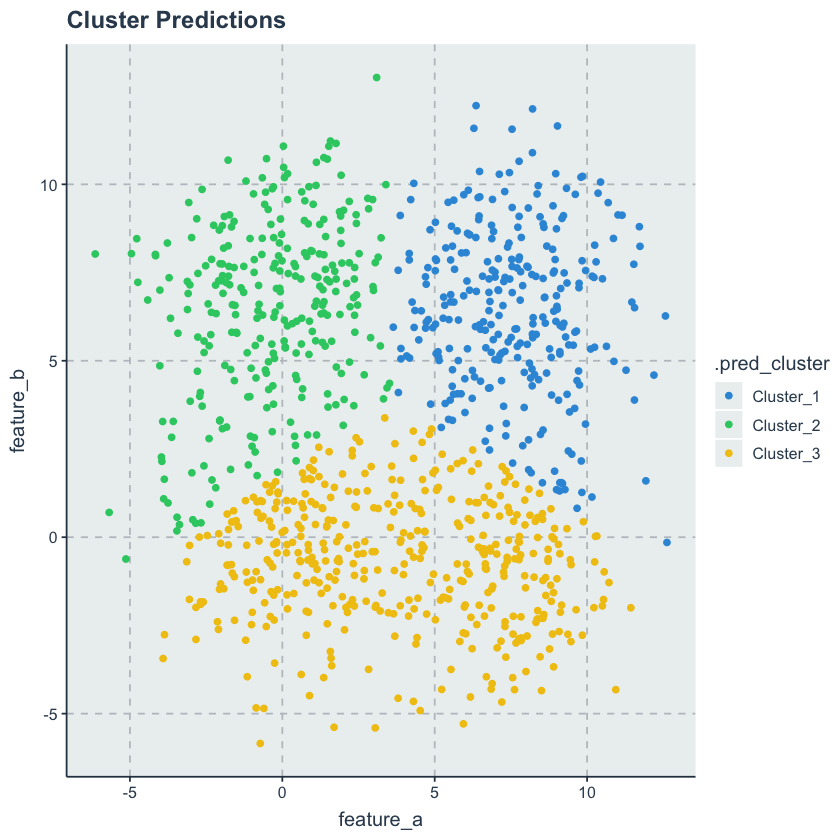

In [43]:
augment(kmeans_fit, new_data = data) %>%
  ggplot(aes(feature_a, feature_b, color = .pred_cluster)) +
  geom_point() + 
  ggtitle("Cluster Predictions")

As always, the predict() and augment() functions are available to us to both extract predicted values and append new values to the datasets.

In [44]:
augment(kmeans_fit, new_data = data)  %>% head()

feature_a,feature_b,.pred_cluster
<dbl>,<dbl>,<fct>
6.28531,11.58790,Cluster_1
9.39775,5.44890,Cluster_1
5.73624,8.68033,Cluster_1
6.10197,9.83266,Cluster_1
9.29479,5.67373,Cluster_1
8.02703,7.67945,Cluster_1


## Tuning the Cluster Size

The results on our base selection of 3 clusters seems pretty decent. But we still are not certain that it is the best result. We can therefore perform cross validation to determine if the cluster size is appropriate or something better may emerge.

In [45]:
kmeans_spec_tuned <- kmeans_spec %>% 
                     set_args(num_clusters = tune()) # set up tuning for clusters

kmeans_wf <- workflow() %>%
             add_model(kmeans_spec_tuned) %>%
             add_formula(~.)

In [46]:
set.seed(1234)
x_boots <- bootstraps(data, times = 10)

num_clusters_grid <- tibble(num_clusters = seq(1, 10))

tune_res <- tune_cluster(
        object = kmeans_wf,
        resamples = x_boots,
        grid = num_clusters_grid
)

### Gathering Tuning Metrics and Visualizing Cluster Performance

The tuning object returns results of the tuning process against SSE by cluster size selection. We can extract these values from the tuning object with collect_metric(). The code below demonstrates this.

In [47]:
tune_res %>% collect_metrics()

num_clusters,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,sse_total,standard,33822.899,10,156.33693,Preprocessor1_Model01
1,sse_within_total,standard,33822.899,10,156.33693,Preprocessor1_Model01
2,sse_total,standard,33822.899,10,156.33693,Preprocessor1_Model02
2,sse_within_total,standard,20228.230,10,160.14937,Preprocessor1_Model02
3,sse_total,standard,33822.899,10,156.33693,Preprocessor1_Model03
3,sse_within_total,standard,12495.876,10,80.58207,Preprocessor1_Model03
4,sse_total,standard,33822.899,10,156.33693,Preprocessor1_Model04
4,sse_within_total,standard,7295.408,10,68.06828,Preprocessor1_Model04
5,sse_total,standard,33822.899,10,156.33693,Preprocessor1_Model05


We can also plot the results directly into the `autoplot()` function. 

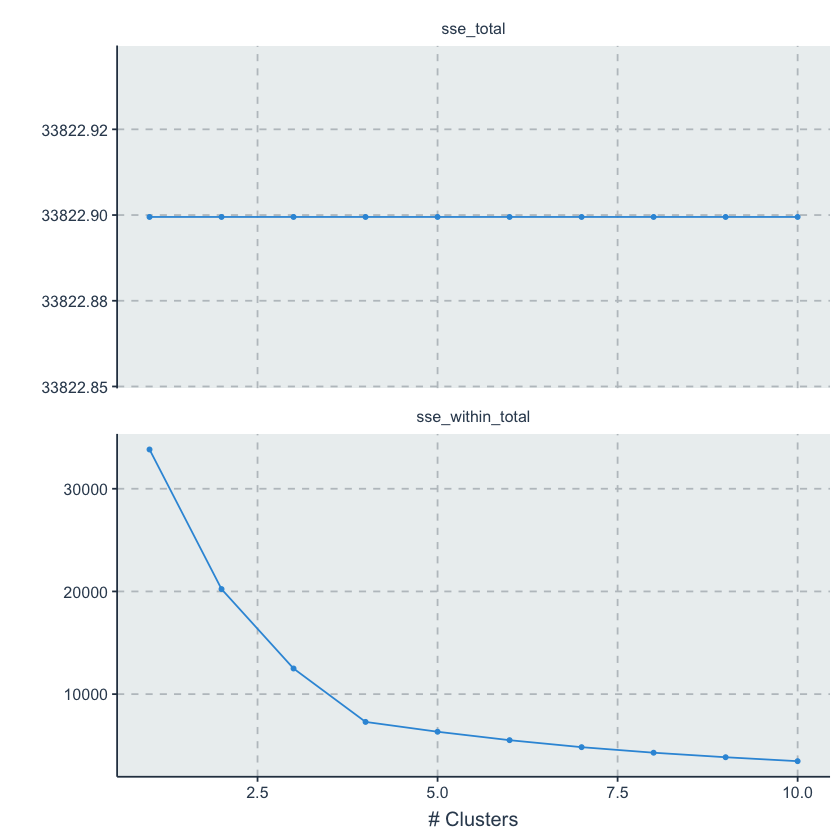

In [48]:
tune_res %>% autoplot()

## Extracting the Final Model

It is often the case that the Elbow method is use to pick the number of clusters. Our cross-validation suggests that cluster=4 performs the best. 



In [49]:
final_kmeans <- kmeans_wf %>%
  update_model(kmeans_spec %>% set_args(num_clusters = 4)) %>%
  fit(data)

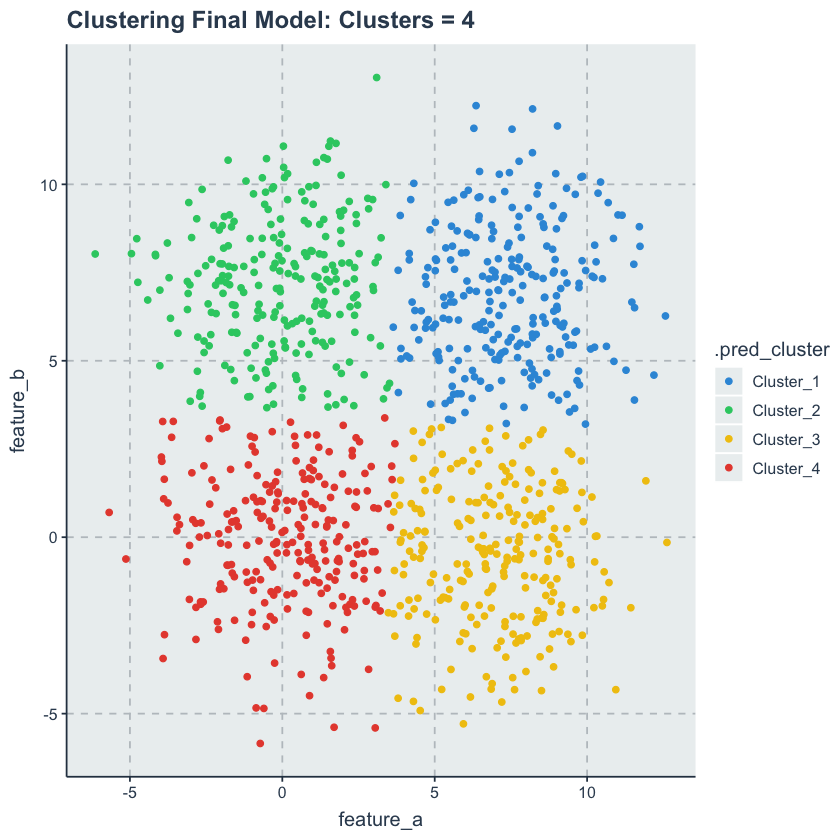

In [50]:
augment(final_kmeans, new_data = data) %>%
  ggplot(aes(feature_a, feature_b, color = .pred_cluster)) +
  geom_point() + 
  ggtitle('Clustering Final Model: Clusters = 4')

### Hierarchical Clustering

The first step in K-Means clustering is the data scientist specifying the number of clusters K to partition the observations into. Hierarchical clustering is an alternative approach which does not require the number of clusters to be defined in advance. Furthermore, hierarchical clustering results can be easily visualized using an attractive tree-based representation called a dendrogram. Once the dendrogram has been constructed, we slice this structure horizontally to identify the clusters formed.

Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a top down approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a bottom up approach. In this lab you will work with agglomerative clustering, commonly referred to as AGNES (AGglomerative NESting), which roughly works as follows:

1. The linkage distances between each of the data points is computed.

2. Points are clustered pairwise with their nearest neighbor.

3. Linkage distances between the clusters are computed.

4. Clusters are combined pairwise into larger clusters.

5. Steps 3 and 4 are repeated until all data points are in a single cluster.


In the section below, we implement Hierarchical clustering on the dataset using complete, average and single linkage methods.

In [51]:
res_hclust_complete <- hier_clust(linkage_method = "complete") %>% fit(~., data = data)

res_hclust_average <- hier_clust(linkage_method = "average") %>% fit(~., data = data)

res_hclust_single <- hier_clust(linkage_method = "single") %>% fit(~., data = data)

### Visualizing the Dendogram

One of the nice things about Hierarchical clustering is the output visual, the dendogram which details which cluster and observation belongs to. We can assess the clusters row wise down the dendogram.

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
i The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


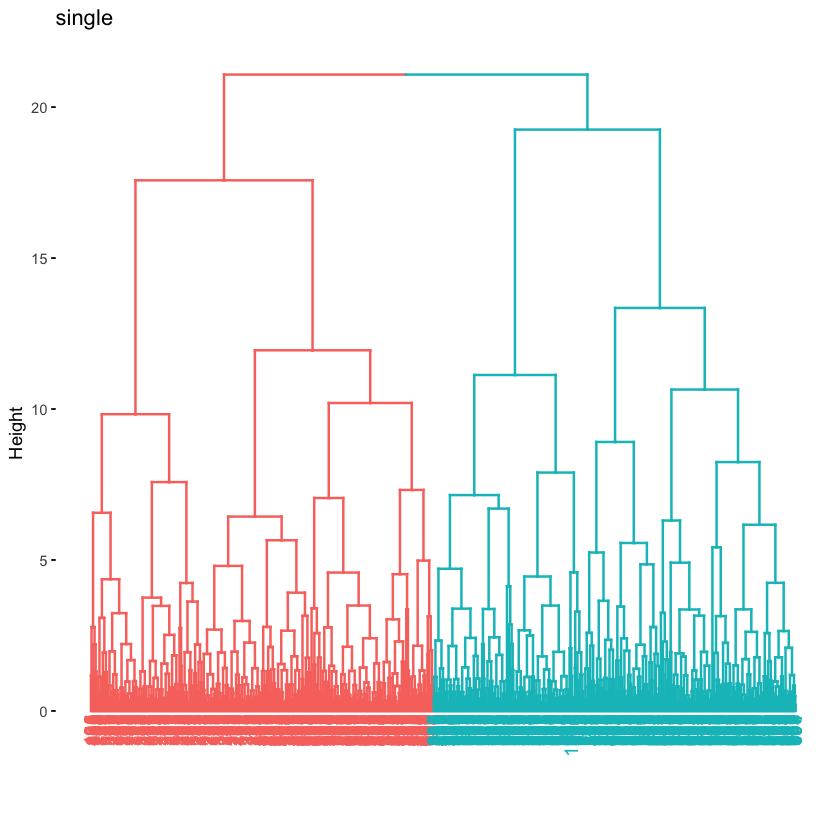

In [52]:
res_hclust_complete %>%
  extract_fit_engine() %>%
  fviz_dend(main = "single", k = 2)

In [ ]:
res_hclust_complete %>%
  extract_fit_engine() %>%
  fviz_dend(main = "complete", k = 2)

In [34]:
res_hclust_complete %>%
  extract_fit_engine() %>%
  fviz_dend(main = "average", k = 2)

ERROR: Error in fviz_dend(., main = "average", k = 2): konnte Funktion "fviz_dend" nicht finden
